**Import Library**

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


**Import File**

In [136]:
df = pd.read_csv('Mobile phone price.csv')


In [137]:
df.head(10)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
5,Apple,iPhone 13,128 GB,4 GB,6.1,12 + 12,2815,799
6,Samsung,Galaxy Z Flip3,256 GB,8 GB,6.7,12 + 12,3300,999
7,Xiaomi,Poco X3 Pro,128 GB,6 GB,6.67,48 + 8 + 2 + 2,5160,249
8,Oppo,Reno6 Pro+ 5G,128 GB,8 GB,6.55,50 + 13 + 16 + 2,4500,699
9,Vivo,X70 Pro+,256 GB,12 GB,6.78,50 + 48 + 12 + 8,4500,1199


In [138]:
df.tail(10)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
397,Xiaomi,Poco M3,128,4,6.53,48+2+2,6000,149
398,Samsung,Galaxy A52 5G,128,6,6.5,64+12+5+5,4500,449
399,Oppo,A93,128,8,6.43,48+8+2+2,4000,319
400,Motorola,Moto G Pro,128,4,6.4,48+16+2,4000,329
401,Huawei,P30 Lite,128,4,6.15,48+8+2,3340,329
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429
406,Samsung,Galaxy S10 Lite,128,6,6.7,48+12+5,4500,649


In [139]:
df.shape

(407, 8)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [141]:
df.describe()

,Battery Capacity (mAh)
count,407.000000
mean,4676.476658
std,797.193713
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000


In [143]:
df['RAM '].unique()

array(['6 GB', '12 GB', '8 GB', '4 GB', '3 GB', '2 GB', '4GB', '8GB',
       '6GB', '12GB', '3GB', '2GB', '5GB', '12', '3', '6', '8', '4', '16',
       '2'], dtype=object)

In [144]:
 df.isna().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

Cleaning of Price Column

In [145]:
y = [x for x in df['Price ($)'] if x.isnumeric() == False]
print(y)

['$799 ', '$799 ', '$399 ', '$699 ', '$329 ', '$399 ', '$999 ', '$699 ', '$699 ', '$549 ', '$1,299 ', '$999 ', '$899 ', '$399 ', '$449 ', '$319 ', '$269 ', '$349 ', '$269 ', '$279 ', '$249 ', '$349 ', '$699 ', '$699 ', '$299 ', '$999 ', '$969 ', '$1,199 ', '$149 ', '$139 ', '$99 ', '$699 ', '$99 ', '$199 ', '$169 ', '$999 ', '$499 ', '$399 ', '$799 ', '$179 ', '$219 ', '$249 ', '$149 ', '$199 ', '$279 ', '$179 ', '$899 ', '$269 ', '$229 ', '$399 ', '$239 ', '$149 ', '$279 ', '$329 ', '$149 ', '$549 ', '$449 ', '$279 ', '$199 ', '$399 ', '$179 ', '$399 ', '$109 ', '$219 ', '$149 ', '$299 ', '$279 ', '$149 ', '$189 ', '$169 ', '$389 ', '$1,199 ', '$299 ', '$219 ', '$299 ', '$149 ', '$249 ', '$219 ', '$249 ', '$179 ', '$299 ', '$309 ', '$179 ', '$369 ', '$349 ', '$499 ', '$199 ', '$229 ', '$299 ', '$129 ', '$449 ', '$499 ', '$279 ', '$399 ', '$849 ', '$279 ', '$299 ', '$249 ', '$149 ', '$199 ', '$469 ', '$329 ', '$279 ', '$369 ', '$269 ', '$329 ', '$299 ', '$299 ', '$239 ', '$329 ', '$149

In [146]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [147]:
def removing_punctuation_df(df, column_name):
    """
    This function looks at a certain column. It then iterates through each row, first changing the object message
    into a string. Then it checks for any punctuations in the message and gets rid of them. Then we take the
    message and turn it into a integer and add it into a list.
    """
    removed_df = []
    for a in df[column_name]:
        message = str(a)
        punct_removed = [char for char in message if char not in string.punctuation]
        punct_removed = ''.join(punct_removed)
        punct_removed = int(punct_removed)
        removed_df.append(punct_removed)
    return removed_df

In [148]:
Price = removing_punctuation_df(df, 'Price ($)') 
df['Price'] = Price
df = df.drop(['Price ($)'], axis=1)

In [117]:
# RAM, Screen Size and Storage Cleaning

In [149]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [150]:
y = [x for x in df['Screen Size (inches)'] if isfloat(x) == False]
print(y)

['6.8 + 3.9', '7.6 (unfolded)']


In [151]:
y = [x for x in df['Storage '] if x.isnumeric() == False]
print(y)

['128 GB', '256 GB', '128 GB', '128 GB', '128 GB', '128 GB', '256 GB', '128 GB', '128 GB', '256 GB', '128 GB', '128 GB', '128 GB', '64 GB', '256 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '64 GB', '32 GB', '128 GB', '32 GB', '128 GB', '128 GB', '128 GB', '64 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '64 GB', '64 GB', '64 GB', '64 GB', '64 GB', '128 GB', '128 GB', '64 GB', '128 GB', '128 GB', '64 GB', '64 GB', '128 GB', '256 GB', '64 GB', '32 GB', '128 GB', '128 GB', '128 GB', '256 GB', '128 GB', '128 GB', '128 GB', '64 GB', '64 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '64 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '256 GB', '64 GB', '128GB', '128GB', '128GB', '128GB', '128GB', '128GB', '256GB', '256GB', '256GB', '128GB', '128GB', '256GB', '256GB', '64GB', '128GB', '128GB', '128GB', '128GB', '128GB', '128GB', '64GB', '128GB', '128GB', '64GB', '32GB', '128GB', '256GB', '256GB', 

In [152]:
y = [x for x in df['RAM '] if x.isnumeric() == False]
print(y)

['6 GB', '12 GB', '8 GB', '6 GB', '8 GB', '4 GB', '8 GB', '6 GB', '8 GB', '12 GB', '6 GB', '6 GB', '8 GB', '4 GB', '12 GB', '6 GB', '8 GB', '6 GB', '6 GB', '8 GB', '6 GB', '4 GB', '6 GB', '8 GB', '6 GB', '4 GB', '3 GB', '6 GB', '3 GB', '4 GB', '6 GB', '4 GB', '3 GB', '6 GB', '8 GB', '4 GB', '6 GB', '8 GB', '4 GB', '3 GB', '3 GB', '4 GB', '4 GB', '8 GB', '8 GB', '4 GB', '8 GB', '4 GB', '4 GB', '4 GB', '4 GB', '4 GB', '4 GB', '2 GB', '6 GB', '4 GB', '4 GB', '6 GB', '8 GB', '8 GB', '12 GB', '4 GB', '3 GB', '8 GB', '8 GB', '6 GB', '8 GB', '6 GB', '3 GB', '4 GB', '4 GB', '4 GB', '8 GB', '6 GB', '4 GB', '12 GB', '4 GB', '4GB', '8GB', '8GB', '8GB', '6GB', '8GB', '12GB', '12GB', '12GB', '6GB', '8GB', '8GB', '8GB', '4GB', '6GB', '6GB', '8GB', '8GB', '8GB', '6GB', '4GB', '6GB', '6GB', '6GB', '3GB', '8GB', '12GB', '12GB', '3GB', '3GB', '3GB', '6GB', '2GB', '6GB', '4GB', '8GB', '6GB', '6GB', '12GB', '4GB', '6GB', '4GB', '4GB', '4GB', '6GB', '4GB', '8GB', '6GB', '6GB', '6GB', '4GB', '3GB', '6GB', '

In [153]:
df.iloc[88,4] = 6.8
df.iloc[373,4] = 7.8

In [154]:
df['Screen Size (in)'] = [float(size) for size in df['Screen Size (inches)']]
df = df.drop('Screen Size (inches)', axis=1)

In [155]:
def no_GBs(df, column):
    y = []
    for x in df[column]:
        string = x.replace("GB", "")
        string = int(string)
        y.append(string)
    return y

In [156]:
RAM = no_GBs(df, "RAM ")
df['RAM'] = RAM
df = df.drop('RAM ', axis=1)

In [128]:
## Lowercasing the Brand and Model

In [157]:
df['Brand'] = df['Brand'].str.lower()
df['Model'] = df['Model'].str.lower()

In [158]:
df

,Brand,Model,Storage,Camera (MP),Battery Capacity (mAh),Price,Screen Size (in),RAM
0,apple,iphone 13 pro,128 GB,12 + 12 + 12,3095,999,6.10,6
1,samsung,galaxy s21 ultra,256 GB,108 + 10 + 10 + 12,5000,1199,6.80,12
2,oneplus,9 pro,128 GB,48 + 50 + 8 + 2,4500,899,6.70,8
3,xiaomi,redmi note 10 pro,128 GB,64 + 8 + 5 + 2,5020,279,6.67,6
4,google,pixel 6,128 GB,50 + 12.2,4614,799,6.40,8
...,...,...,...,...,...,...,...,...
402,samsung,galaxy note20 5g,128,12+64+12,4300,1049,6.70,8
403,xiaomi,mi 10 lite 5g,128,48+8+2+2,4160,349,6.57,6
404,apple,iphone 12 pro max,128,12+12+12,3687,1099,6.70,6
405,oppo,reno3,128,48+13+8+2,4025,429,6.40,8


In [159]:
# Splitting of Camera (MP)

In [160]:
# This code box was taken from Esposte's notebook. All credit goes to him for this code

res1 = []
res2 = []
res3 = []
res4 = []
for x in df['Camera (MP)']:
    resolutions = x.split('+')
    tam = len(resolutions)
    
    if tam == 1:
        res1.append(resolutions[0])
        res2.append('0')
        res3.append('0')
        res4.append('0')
    
    if tam == 2:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append('0')
        res4.append('0')
    
    if tam == 3:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append('0')
    
    if tam == 4:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append(resolutions[3])
    
df['res1'] = res1
df['res2'] = res2
df['res3'] = res3
df['res4'] = res4

df = df.drop(columns='Camera (MP)')

In [161]:
df

,Brand,Model,Storage,Battery Capacity (mAh),Price,Screen Size (in),RAM,res1,res2,res3,res4
0,apple,iphone 13 pro,128 GB,3095,999,6.10,6,12,12,12,0
1,samsung,galaxy s21 ultra,256 GB,5000,1199,6.80,12,108,10,10,12
2,oneplus,9 pro,128 GB,4500,899,6.70,8,48,50,8,2
3,xiaomi,redmi note 10 pro,128 GB,5020,279,6.67,6,64,8,5,2
4,google,pixel 6,128 GB,4614,799,6.40,8,50,12.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
402,samsung,galaxy note20 5g,128,4300,1049,6.70,8,12,64,12,0
403,xiaomi,mi 10 lite 5g,128,4160,349,6.57,6,48,8,2,2
404,apple,iphone 12 pro max,128,3687,1099,6.70,6,12,12,12,0
405,oppo,reno3,128,4025,429,6.40,8,48,13,8,2


In [163]:
df['Price'].unique()

array([ 999, 1199,  899,  279,  799,  249,  699,  329,  449,  199,  299,
        379,  179,  729,  599,  139,  189,  399,  259,  159,  229,  499,
        129,  529,  369, 1099,  169,   99,  459,  239, 1299,  429,  659,
        269,  359,  549,  319,  349,  969,  149,  219,  109,  389,  309,
        849,  469,  209,  119,  339,  289,  130,  749,  649,  419, 1399,
       1999, 1049])

In [167]:
df['Screen Size (in)'].unique()

array([6.1 , 6.8 , 6.7 , 6.67, 6.4 , 6.55, 6.78, 6.43, 6.5 , 6.62, 5.4 ,
       6.2 , 6.51, 6.6 , 4.7 , 6.58, 6.52, 6.44, 6.53, 6.56, 4.5 , 6.39,
       5.9 , 5.5 , 6.81, 5.99, 6.82, 6.3 , 6.22, 6.  , 6.35, 6.9 , 6.76,
       6.49, 6.72, 5.7 , 6.47, 7.8 , 6.15, 6.57])

In [169]:
df[df["Screen Size (in)"] == '7.6 (unfolded)']

,Brand,Model,Storage,Battery Capacity (mAh),Price,Screen Size (in),RAM,res1,res2,res3,res4


In [172]:
df.loc[df["Screen Size (in)"] == '7.6 (unfolded)']

,Brand,Model,Storage,Battery Capacity (mAh),Price,Screen Size (in),RAM,res1,res2,res3,res4


In [173]:
df[df["Screen Size (in)"] == '6.8 + 3.9']

,Brand,Model,Storage,Battery Capacity (mAh),Price,Screen Size (in),RAM,res1,res2,res3,res4


In [174]:
df[df["Screen Size (in)"].str.isnumeric() == False]

AttributeError: Can only use .str accessor with string values!

In [21]:
df[df["Price ($)"].str.isnumeric() == False]

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
77,Apple,iPhone 13,128GB,4GB,6.1,12MP + 12MP,2815,$799
78,Samsung,Galaxy S21,128GB,8GB,6.2,64MP + 12MP + 12MP,4000,$799
79,OnePlus,Nord 2,128GB,8GB,6.43,50MP + 8MP + 2MP,4500,$399
80,Google,Pixel 6,128GB,8GB,6.4,50MP + 12MP,4600,$699
81,Xiaomi,Poco X4 Pro,128GB,6GB,6.67,48MP + 8MP + 2MP + 2MP,5160,$329
...,...,...,...,...,...,...,...,...
283,Oppo,A31,128GB,4GB,6.5,12MP + 2MP + 2MP,4230,$199
284,Vivo,Y15,64GB,4GB,6.35,13MP + 8MP + 2MP,5000,$189
285,Realme,Narzo 10A,32GB,3GB,6.5,12MP + 2MP + 2MP,5000,$129
286,Xiaomi,Redmi 9T,128GB,4GB,6.53,48MP + 8MP + 2MP + 2MP,6000,$229


In [22]:
df["Price ($)"] = df["Price ($)"].str.replace('$','')
df["Price ($)"] = df["Price ($)"].str.replace(',','')
df["Price ($)"] = df["Price ($)"].astype(int)
df.describe()

,Battery Capacity (mAh),Price ($)
count,407.000000,407.000000
mean,4676.476658,408.314496
std,797.193713,299.684768
min,1821.000000,99.000000
25%,4300.000000,199.000000
50%,5000.000000,299.000000
75%,5000.000000,499.000000
max,7000.000000,1999.000000


In [23]:
df.describe()

,Battery Capacity (mAh),Price ($)
count,407.000000,407.000000
mean,4676.476658,408.314496
std,797.193713,299.684768
min,1821.000000,99.000000
25%,4300.000000,199.000000
50%,5000.000000,299.000000
75%,5000.000000,499.000000
max,7000.000000,1999.000000


In [24]:
print(df["Price ($)"].dtypes)

int64


In [29]:
df["Price ($)"] = df["Price ($)"].astype(str)

In [26]:
df["Price ($)"] = df["Price ($)"].str.replace('[^0-9]','',regex=True)
df['Price ($)'] = df['Price ($)'].astype(int)
df.describe()

,Battery Capacity (mAh),Price ($)
count,407.000000,407.000000
mean,4676.476658,408.314496
std,797.193713,299.684768
min,1821.000000,99.000000
25%,4300.000000,199.000000
50%,5000.000000,299.000000
75%,5000.000000,499.000000
max,7000.000000,1999.000000


In [30]:
df["Price ($)"] = df["Price ($)"].str.replace('[^a-zA-Z0-9]+','',regex=True)
df['Price ($)'] = df['Price ($)'].astype(int)
df.describe()

,Battery Capacity (mAh),Price ($)
count,407.000000,407.000000
mean,4676.476658,408.314496
std,797.193713,299.684768
min,1821.000000,99.000000
25%,4300.000000,199.000000
50%,5000.000000,299.000000
75%,5000.000000,499.000000
max,7000.000000,1999.000000


In [23]:
print(df.columns)

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')


In [24]:
df["RAM "] = df["RAM "].str.replace('[^0-9]','', regex=True)
df["RAM "] = df["RAM "].astype(int)
df.describe()

,RAM,Battery Capacity (mAh),Price ($)
count,407.000000,407.000000,407.000000
mean,5.837838,4676.476658,408.314496
std,2.431980,797.193713,299.684768
min,2.000000,1821.000000,99.000000
25%,4.000000,4300.000000,199.000000
50%,6.000000,5000.000000,299.000000
75%,8.000000,5000.000000,499.000000
max,16.000000,7000.000000,1999.000000


In [25]:
df.sort_values(by=['Battery Capacity (mAh)','Price ($)'],ascending=[True,False])

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
379,Apple,iPhone SE (2020),128,3,4.7,12,1821,449
32,Apple,iPhone SE (2nd Gen),64 GB,3,4.7,12,1821,399
62,Apple,iPhone SE (2020),64 GB,3,4.7,12,1821,399
289,Apple,iPhone SE (2020),64,3,4.7,12,1821,399
333,Apple,iPhone SE (2020),64,3,4.7,12,1821,399
...,...,...,...,...,...,...,...,...
198,Motorola,Moto G9 Power Lite,64GB,4,6.5,48MP + 2MP + 2MP,6000,149
217,Nokia,C30,32GB,2,6.82,13MP + 2MP,6000,149
397,Xiaomi,Poco M3,128,4,6.53,48+2+2,6000,149
334,Samsung,Galaxy M51,128,6,6.7,64+12+5+5,7000,449


In [26]:
df.nlargest(5,'Battery Capacity (mAh)')

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
208,Samsung,Galaxy M62,128GB,8,6.7,64MP + 12MP + 5MP + 5MP,7000,429
334,Samsung,Galaxy M51,128,6,6.7,64+12+5+5,7000,449
20,Xiaomi,Redmi 10 Prime,128 GB,6,6.5,50 + 8 + 2 + 2,6000,179
29,Realme,9i,128 GB,4,6.5,50 + 2 + 2,6000,189
35,Realme,C25s,128 GB,4,6.5,13 + 2 + 2,6000,159


In [27]:
# df.loc[baris, kolom]
df.loc[(df['Brand'] == 'Xiaomi') & (df['RAM '] == 8),['Model', 'Storage ', 'Price ($)']]

,Model,Storage,Price ($)
44,Mi 11X,128 GB,529
130,Redmi Note 10 Pro Max,128GB,329
157,Poco X3 GT,128GB,299
222,Mi 11 Lite 5G,128GB,429
227,Poco X3 GT,128GB,329
229,Redmi Note 10 Pro Max,128GB,329
298,Mi 11,256,749
325,Mi 10T Pro,256,599
374,Mi 10T Pro 5G,128,599


In [29]:
df.iloc[5:10,1:4]

,Model,Storage,RAM
5,iPhone 13,128 GB,4
6,Galaxy Z Flip3,256 GB,8
7,Poco X3 Pro,128 GB,6
8,Reno6 Pro+ 5G,128 GB,8
9,X70 Pro+,256 GB,12


In [28]:
df['battery dollar'] = df['Battery Capacity (mAh)']/df['Price ($)']
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),battery dollar
0,Apple,iPhone 13 Pro,128 GB,6,6.1,12 + 12 + 12,3095,999,3.098098
1,Samsung,Galaxy S21 Ultra,256 GB,12,6.8,108 + 10 + 10 + 12,5000,1199,4.170142
2,OnePlus,9 Pro,128 GB,8,6.7,48 + 50 + 8 + 2,4500,899,5.005562
3,Xiaomi,Redmi Note 10 Pro,128 GB,6,6.67,64 + 8 + 5 + 2,5020,279,17.992832
4,Google,Pixel 6,128 GB,8,6.4,50 + 12.2,4614,799,5.774718
...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049,4.099142
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349,11.919771
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099,3.354868
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429,9.382284


In [30]:
df.sort_values(by=['battery dollar'], ascending=False)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),battery dollar
273,Realme,C11,32GB,2,6.5,13MP + 2MP,5000,99,50.505051
216,Realme,C11 2021,32GB,2,6.52,8MP + 2MP,5000,99,50.505051
53,Realme,Narzo 50i,32 GB,2,6.5,50 + 2,5000,99,50.505051
109,Motorola,Moto E7i Power,32GB,2,6.5,13MP + 2MP,5000,99,50.505051
250,Realme,C11 2021,32GB,2,6.5,8MP + 2MP,5000,99,50.505051
...,...,...,...,...,...,...,...,...,...
361,Huawei,P40 Pro+,512,8,6.58,50+40+12+3D,4200,1399,3.002144
338,Apple,iPhone XS Max,256,4,6.5,12+12,3174,1099,2.888080
384,Apple,iPhone 12 Pro,128,6,6.1,12+12+12,2815,999,2.817818
369,Apple,iPhone 12 mini,256,4,5.4,12+12,2227,899,2.477197


In [101]:
df.groupby(['Brand'])['Battery Capacity (mAh)', 'Price ($)'].mean()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [102]:
df.groupby(['Brand'])['Battery Capacity (mAh)', 'Price ($)'].mean().sort_values(by='Battery Capacity (mAh)')

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [33]:
df.groupby('Brand').agg(average_price=('Price ($)','mean'),sum_price=('Price ($)','sum'))


,average_price,sum_price
Brand,,
Apple,745.666667,22370
Asus,874.000000,3496
Blackberry,499.000000,1497
CAT,299.000000,299
Google,699.000000,4893
Huawei,783.166667,9398
LG,615.666667,1847
Motorola,278.130435,6397
Nokia,244.714286,6852


In [34]:
pd.crosstab(df['Brand'],df['RAM '])

RAM,2,3,4,5,6,8,12,16
Brand,,,,,,,,
Apple,0,11,14,0,5,0,0,0
Asus,0,0,0,0,1,3,0,0
Blackberry,0,0,1,0,2,0,0,0
CAT,0,1,0,0,0,0,0,0
Google,0,0,0,0,2,5,0,0
Huawei,0,0,2,0,0,10,0,0
LG,0,0,0,0,2,1,0,0
Motorola,1,2,14,2,3,0,1,0
Nokia,4,8,10,0,4,2,0,0


In [35]:
df.pivot_table(index=['Brand'], values='Price ($)', aggfunc='mean' )

,Price ($)
Brand,
Apple,745.666667
Asus,874.000000
Blackberry,499.000000
CAT,299.000000
Google,699.000000
Huawei,783.166667
LG,615.666667
Motorola,278.130435
Nokia,244.714286


In [36]:
df.pivot_table(index=['Brand'], columns='RAM ', values='Price ($)', aggfunc='mean')

RAM,2,3,4,5,6,8,12,16
Brand,,,,,,,,
Apple,NaN,494.454545,838.285714,NaN,1039.000000,NaN,NaN,NaN
Asus,NaN,NaN,NaN,NaN,699.000000,932.333333,NaN,NaN
Blackberry,NaN,NaN,399.000000,NaN,549.000000,NaN,NaN,NaN
CAT,NaN,299.000000,NaN,NaN,NaN,NaN,NaN,NaN
Google,NaN,NaN,NaN,NaN,649.000000,719.000000,NaN,NaN
Huawei,NaN,NaN,264.000000,NaN,NaN,887.000000,NaN,NaN
LG,NaN,NaN,NaN,NaN,424.000000,999.000000,NaN,NaN
Motorola,99.0,184.000000,239.714286,399.0,359.000000,NaN,699.0,NaN
Nokia,134.0,142.750000,228.000000,NaN,474.000000,499.000000,NaN,NaN


In [37]:
print(df.columns)

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)', 'battery dollar'],
      dtype='object')


In [38]:
df.melt(id_vars=['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)'],
var_name = 'nama_kolom', #rename
value_name ='isi value') #rename


,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),nama_kolom,isi value
0,Apple,iPhone 13 Pro,128 GB,6,6.1,12 + 12 + 12,Battery Capacity (mAh),3095.000000
1,Samsung,Galaxy S21 Ultra,256 GB,12,6.8,108 + 10 + 10 + 12,Battery Capacity (mAh),5000.000000
2,OnePlus,9 Pro,128 GB,8,6.7,48 + 50 + 8 + 2,Battery Capacity (mAh),4500.000000
3,Xiaomi,Redmi Note 10 Pro,128 GB,6,6.67,64 + 8 + 5 + 2,Battery Capacity (mAh),5020.000000
4,Google,Pixel 6,128 GB,8,6.4,50 + 12.2,Battery Capacity (mAh),4614.000000
...,...,...,...,...,...,...,...,...
1216,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,battery dollar,4.099142
1217,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,battery dollar,11.919771
1218,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,battery dollar,3.354868
1219,Oppo,Reno3,128,8,6.4,48+13+8+2,battery dollar,9.382284


In [39]:
bin_labels_4 = ['Bronze', 'Silver', 'Gold', 'Platinum']
results, bin_edges = pd.qcut(df['Price ($)'], q=4,
                             labels=bin_labels_4,
                             retbins=True)

In [40]:
results

0      Platinum
1      Platinum
2      Platinum
3        Silver
4      Platinum
         ...   
402    Platinum
403        Gold
404    Platinum
405        Gold
406    Platinum
Name: Price ($), Length: 407, dtype: category
Categories (4, object): ['Bronze' < 'Silver' < 'Gold' < 'Platinum']

In [41]:
bin_edges

array([  99.,  199.,  299.,  499., 1999.])

In [42]:
results_table = pd.DataFrame(zip(bin_edges,bin_labels_4),
                             columns=['Threshold', 'Tier'])

In [43]:
results_table

,Threshold,Tier
0,99.0,Bronze
1,199.0,Silver
2,299.0,Gold
3,499.0,Platinum


In [44]:
df['results'] = results
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),battery dollar,results
0,Apple,iPhone 13 Pro,128 GB,6,6.1,12 + 12 + 12,3095,999,3.098098,Platinum
1,Samsung,Galaxy S21 Ultra,256 GB,12,6.8,108 + 10 + 10 + 12,5000,1199,4.170142,Platinum
2,OnePlus,9 Pro,128 GB,8,6.7,48 + 50 + 8 + 2,4500,899,5.005562,Platinum
3,Xiaomi,Redmi Note 10 Pro,128 GB,6,6.67,64 + 8 + 5 + 2,5020,279,17.992832,Silver
4,Google,Pixel 6,128 GB,8,6.4,50 + 12.2,4614,799,5.774718,Platinum
...,...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049,4.099142,Platinum
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349,11.919771,Gold
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099,3.354868,Platinum
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429,9.382284,Gold


In [45]:
df['results'].value_counts()

Bronze      119
Silver      101
Platinum     95
Gold         92
Name: results, dtype: int64

In [46]:
bins = [0, 1000, 2000, 3000, 4000, 5000, 10000]
labels = [1,2,3,4,5,6]
df['binned_battery'] = pd.cut(df['Battery Capacity (mAh)'], bins=bins, labels=labels)

In [47]:
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),battery dollar,results,binned_battery
0,Apple,iPhone 13 Pro,128 GB,6,6.1,12 + 12 + 12,3095,999,3.098098,Platinum,4
1,Samsung,Galaxy S21 Ultra,256 GB,12,6.8,108 + 10 + 10 + 12,5000,1199,4.170142,Platinum,5
2,OnePlus,9 Pro,128 GB,8,6.7,48 + 50 + 8 + 2,4500,899,5.005562,Platinum,5
3,Xiaomi,Redmi Note 10 Pro,128 GB,6,6.67,64 + 8 + 5 + 2,5020,279,17.992832,Silver,6
4,Google,Pixel 6,128 GB,8,6.4,50 + 12.2,4614,799,5.774718,Platinum,5
...,...,...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049,4.099142,Platinum,5
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349,11.919771,Gold,5
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099,3.354868,Platinum,4
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429,9.382284,Gold,5


# Visualization

Text(0, 0.5, 'Number of Models Released')

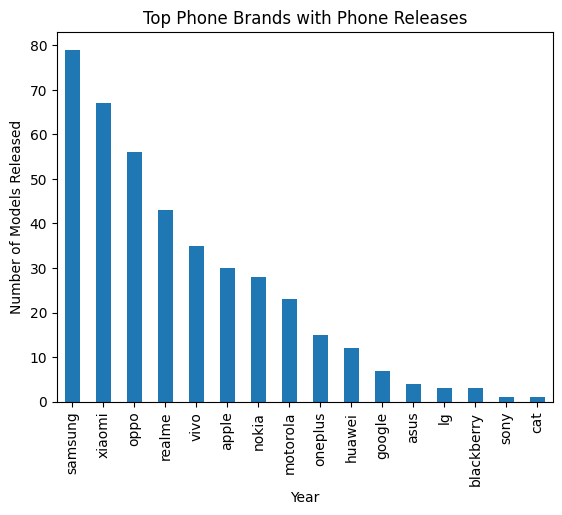

In [73]:
ax = df['Brand'].value_counts().plot(kind='bar', title='Top Phone Brands with Phone Releases')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Models Released')

Text(0, 0.5, 'Average Price')

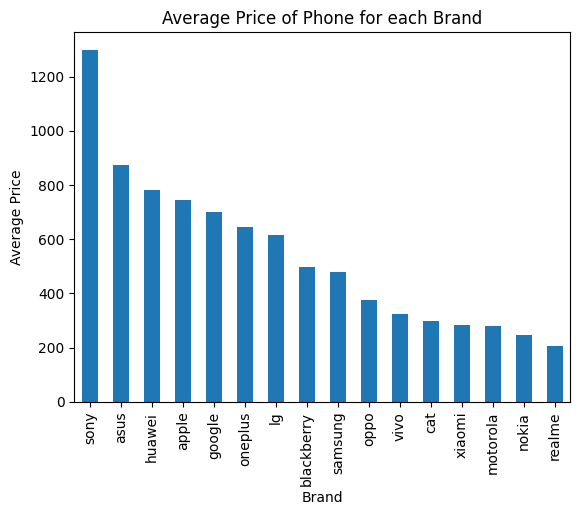

In [94]:
ax = df.groupby(by='Brand')['Price'].mean().sort_values(ascending=False)\
.plot(kind='bar',title='Average Price of Phone for each Brand')
ax.set_xlabel("Brand")
ax.set_ylabel("Average Price")

In [ ]:
### Amount of RAM in phones offered by Brands

Text(0, 0.5, 'Count')

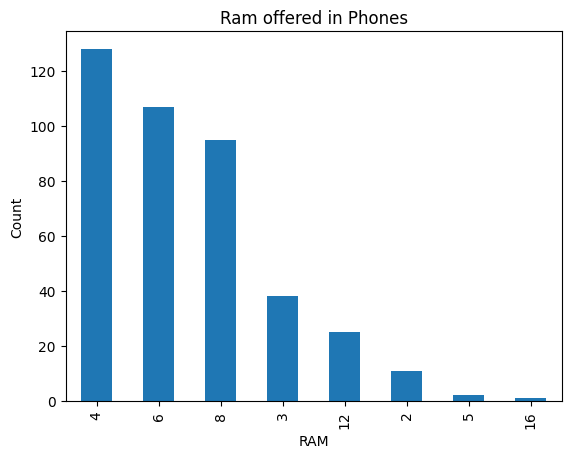

In [80]:
ax = df['RAM'].value_counts().plot(kind='bar', title='Ram offered in Phones')
ax.set_xlabel('RAM')
ax.set_ylabel('Count')

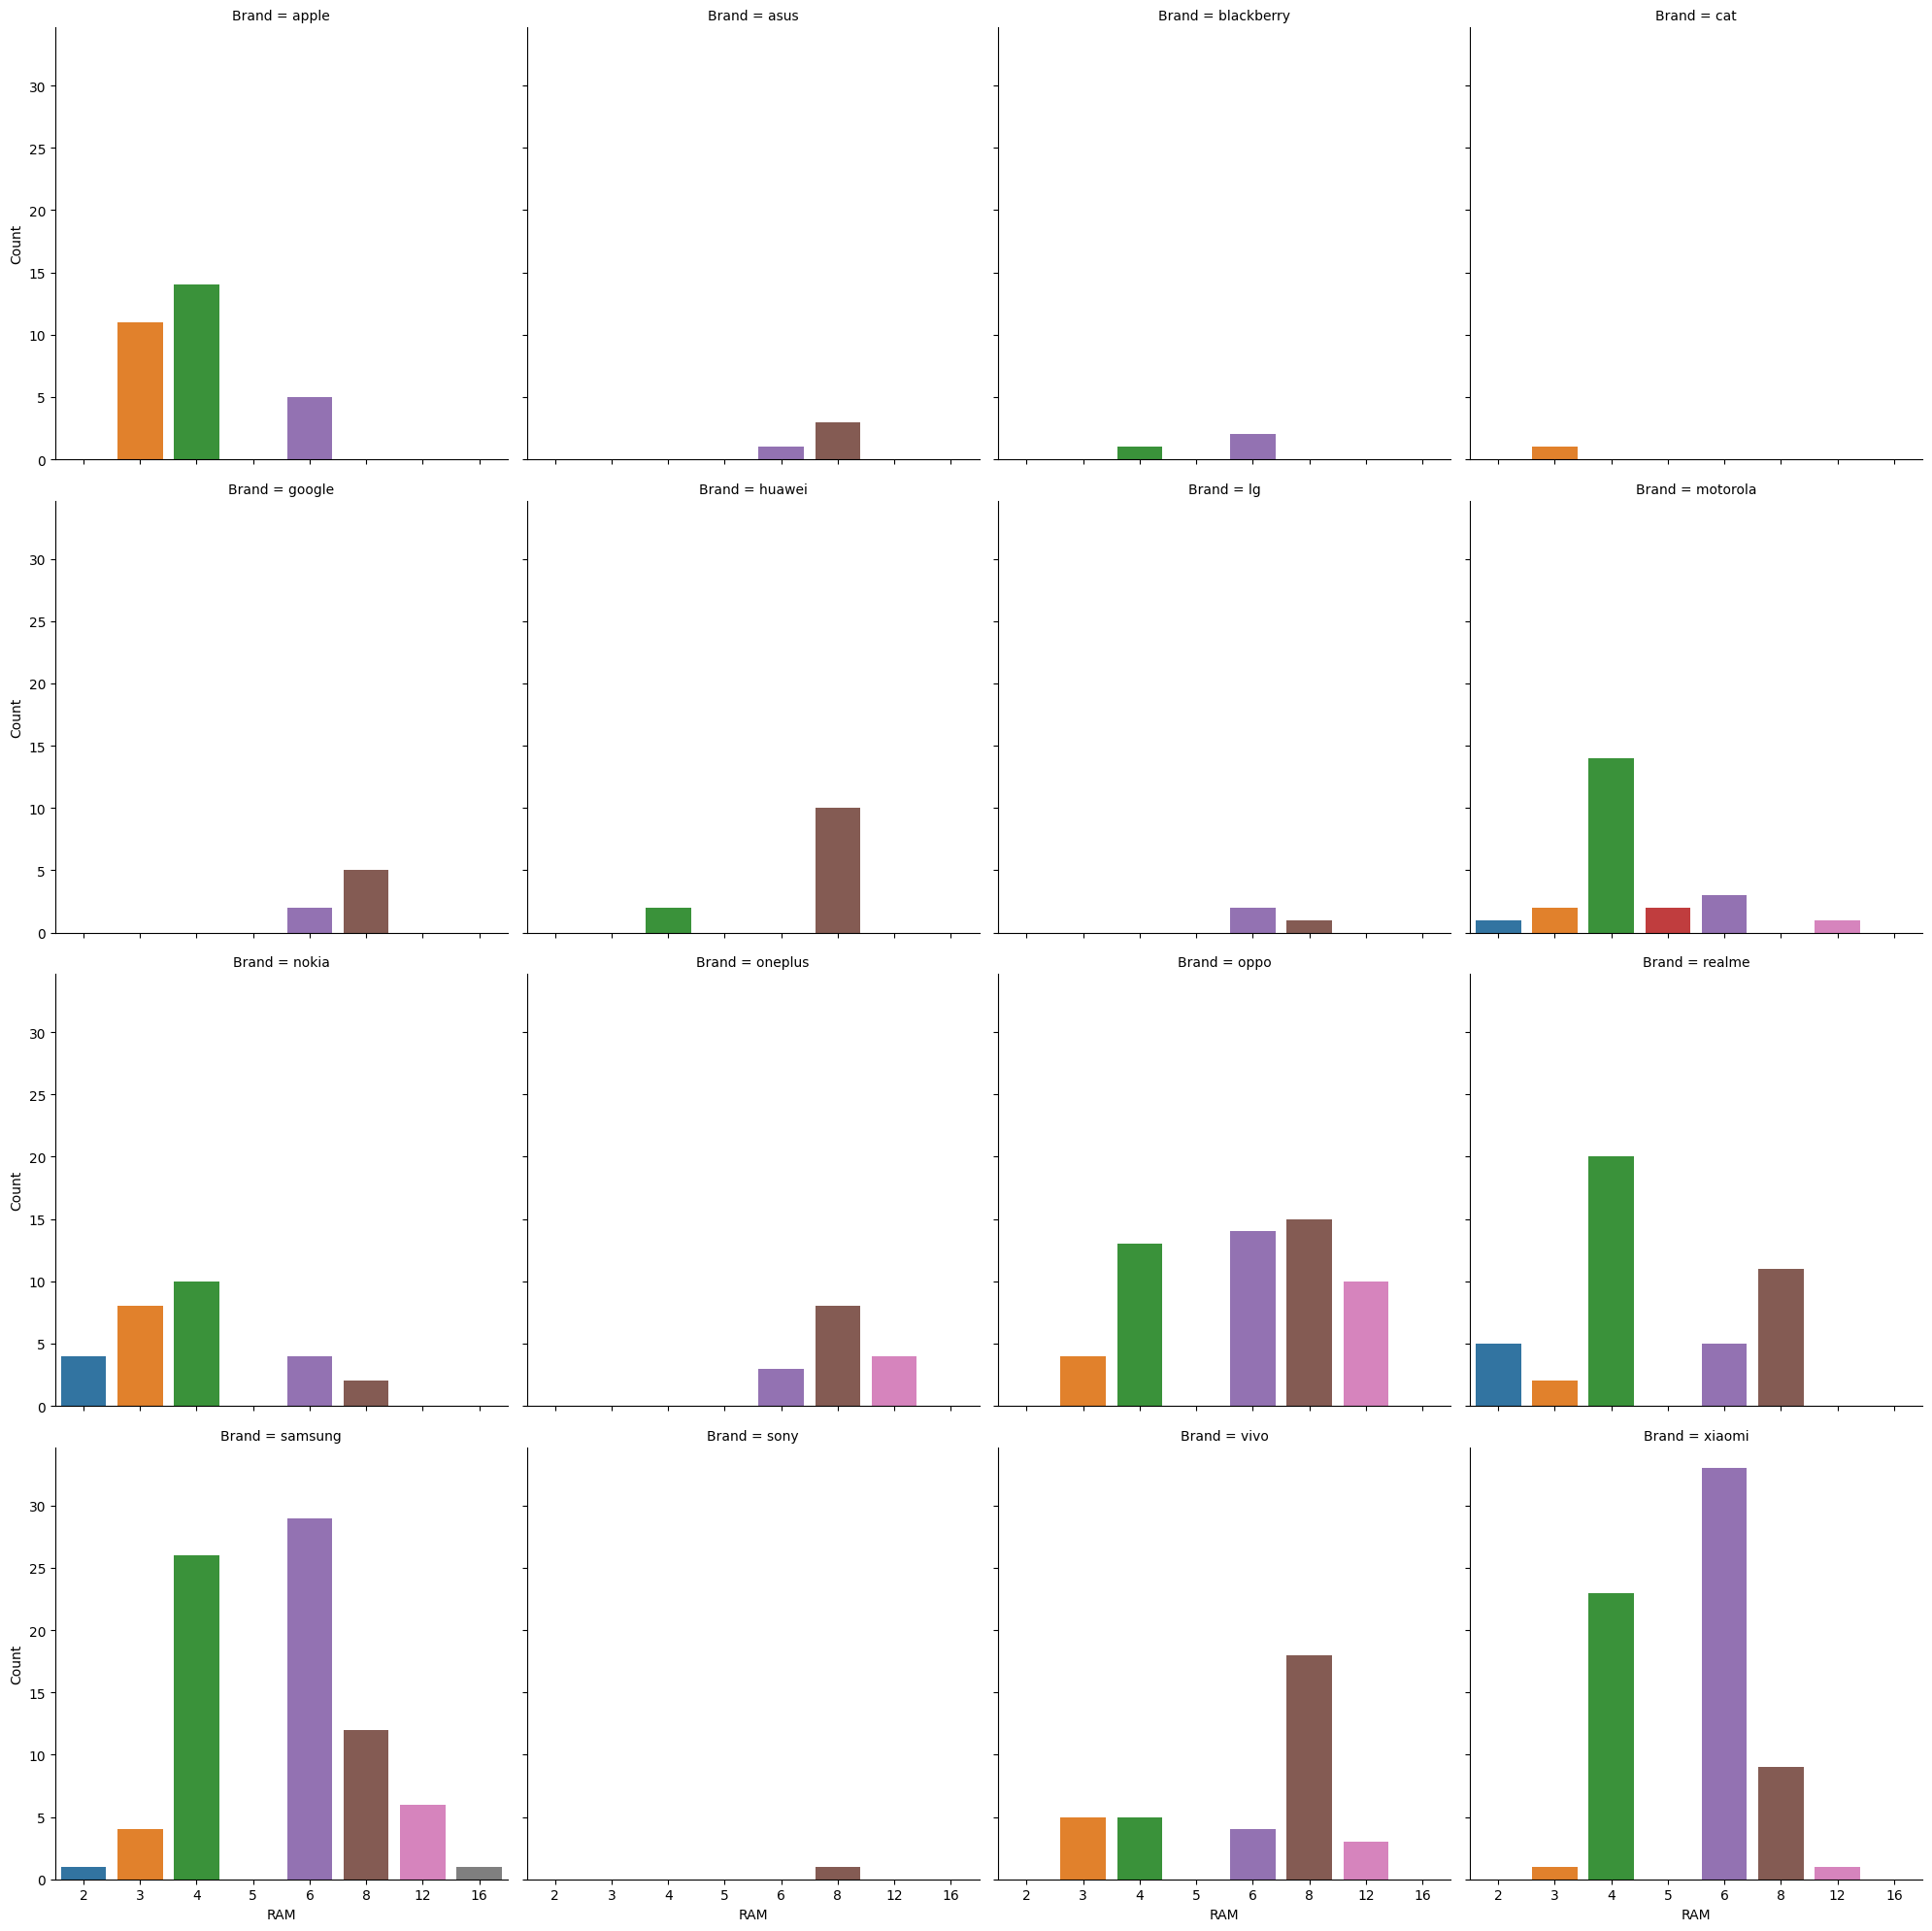

In [81]:
ax = df.groupby(by=['Brand','RAM']).count().reset_index()

plot = sns.catplot(data=ax, x='RAM', y='Model', col_wrap=4, col='Brand', kind='bar')
plot.set_ylabels('Count')

In [93]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)

ValueError: could not convert string to float: 'apple'

<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='Battery Capacity (mAh)', ylabel='Price'>

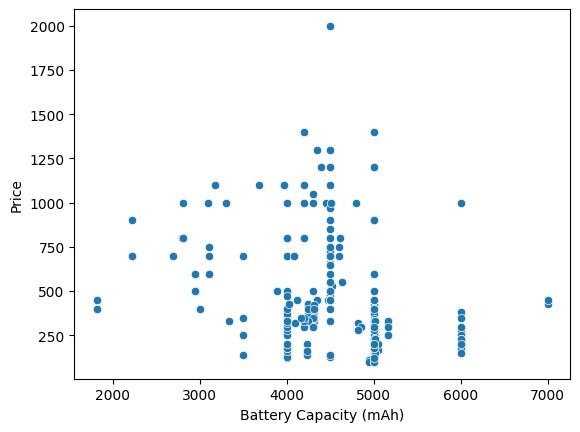

In [92]:
sns.scatterplot(data=df, x='Battery Capacity (mAh)', y='Price')

<Axes: xlabel='Screen Size (in)', ylabel='Price'>

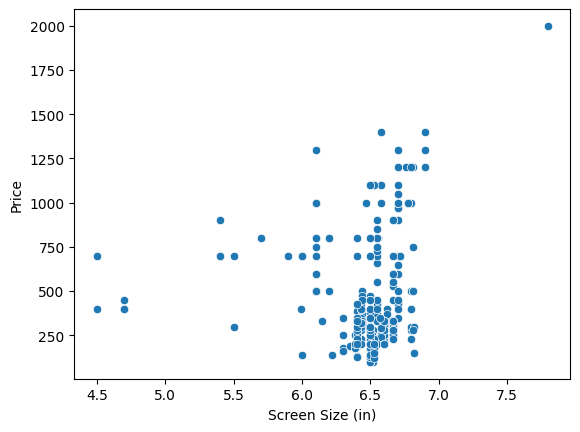

In [96]:
sns.scatterplot(data=df, x='Screen Size (in)', y='Price')

<Axes: xlabel='RAM', ylabel='Price'>

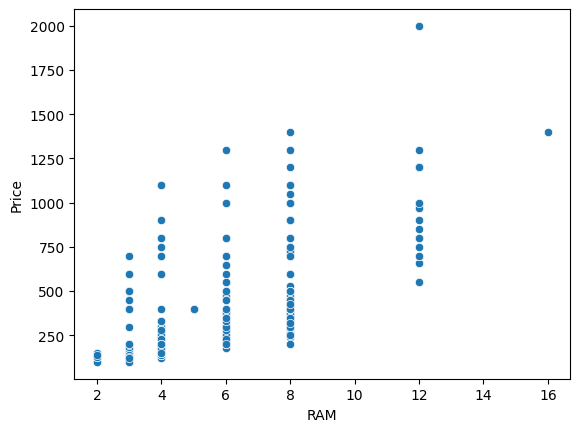

In [97]:
sns.scatterplot(data=df, x='RAM', y='Price')

<Axes: xlabel='Storage', ylabel='Price'>

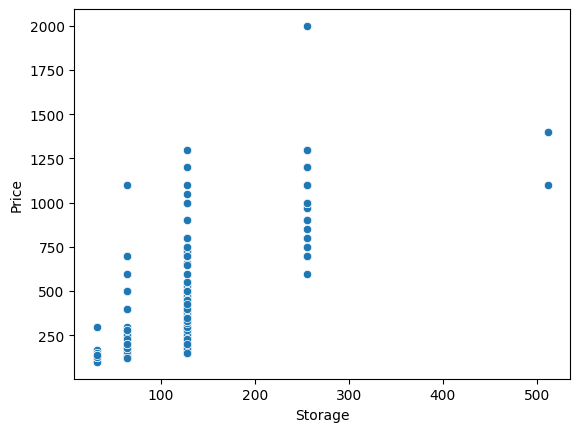

In [99]:
sns.scatterplot(data=df, x='Storage',y='Price')

Text(0, 0.5, 'Count')

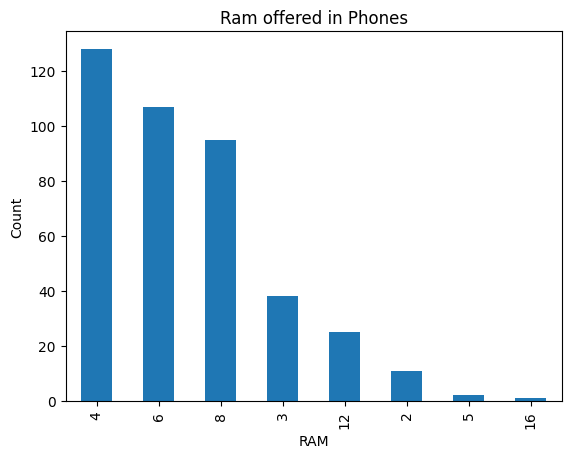

In [71]:
ax = df['RAM'].value_counts().plot(kind='bar', title='Ram offered in Phones')
ax.set_xlabel('RAM')
ax.set_ylabel('Count')

In [33]:
ax = df.groupby(by='Brand')['Price'].mean().sort_values(ascending=False)\
.plot(kind='bar',title='Average Price of Phone for each Brand')
ax.set_xlabel("Brand")
ax.set_ylabel("Average Price")

KeyError: 'Column not found: Price'